In [168]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [169]:
data=pd.read_csv('Churn_Modelling.csv')

In [170]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [171]:
X=data.iloc[:,3:13]
y=data.iloc[:,13]

In [172]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [173]:
geography=pd.get_dummies(data['Geography'],drop_first=True)
gender=pd.get_dummies(data['Gender'],drop_first=True)

In [174]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [175]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [176]:
X=pd.concat([X,geography,gender],axis=1)

In [177]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [178]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [179]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [180]:
X_train_new=X_train
y_train_new=y_train
X_test_new=X_test
y_test_new=y_test

In [181]:
## Make ANN Layers 
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [182]:
classifier=Sequential()

## Training Model with Params like kernel_initializer='he_uniform' activation='relu' optimizer = 'adam', loss = 'binary_crossentropy'

In [183]:
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim=11))
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))
#classifier.add(Dense(units=30,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [184]:
classifier.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_77 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [185]:
## Creating 2nd Model 

In [139]:
classifier1=Sequential()
classifier1.add(Dense(units=30,kernel_initializer='glorot_uniform',activation='relu',input_dim=11))
classifier1.add(Dense(units=30,kernel_initializer='glorot_uniform',activation='relu'))
classifier1.add(Dense(units=30,kernel_initializer='glorot_uniform',activation='relu'))
classifier1.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
# Compiling the ANN
classifier1.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'])

In [140]:
classifier1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 30)                360       
_________________________________________________________________
dense_70 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_71 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 31        
Total params: 2,251
Trainable params: 2,251
Non-trainable params: 0
_________________________________________________________________


In [186]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 100,epochs = 100)

Epoch 1/100
54/54 [==============================] - 0s 6ms/step - loss: 1.6624 - accuracy: 0.2480 - val_loss: 1.1265 - val_accuracy: 0.3415
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.8574 - accuracy: 0.4738 - val_loss: 0.6637 - val_accuracy: 0.6229
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5900 - accuracy: 0.7027 - val_loss: 0.5416 - val_accuracy: 0.7592
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5188 - accuracy: 0.7789 - val_loss: 0.5051 - val_accuracy: 0.7895
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4932 - accuracy: 0.7929 - val_loss: 0.4883 - val_accuracy: 0.7993
Epoch 6/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4788 - accuracy: 0.7966 - val_loss: 0.4770 - val_accuracy: 0.8001
Epoch 7/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.7996 - val_loss: 0.4682 - val_accuracy: 0.7997
Epoch 8/100
5

Epoch 59/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.8625 - val_loss: 0.3658 - val_accuracy: 0.8508
Epoch 60/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8630 - val_loss: 0.3657 - val_accuracy: 0.8501
Epoch 61/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8627 - val_loss: 0.3653 - val_accuracy: 0.8512
Epoch 62/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8638 - val_loss: 0.3657 - val_accuracy: 0.8504
Epoch 63/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8634 - val_loss: 0.3652 - val_accuracy: 0.8519
Epoch 64/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8645 - val_loss: 0.3652 - val_accuracy: 0.8504
Epoch 65/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3314 - accuracy: 0.8645 - val_loss: 0.3656 - val_accuracy: 0.8504
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


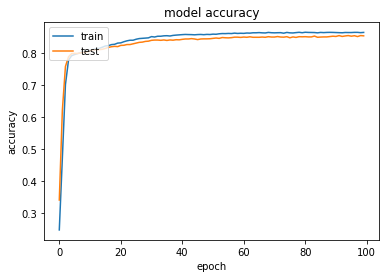

In [187]:
# list all data in history
import matplotlib.pyplot as plt
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()